## **🧠 Part 1: Load Model & Make Prediction on an Image**

**✅ STEP 1: Setup & Imports**

In [ ]:
# 🍅 STEP 1: Install Required Libraries
!pip install openai requests

# ✅ STEP 2: Import Core Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import requests
import json


**✅ STEP 3: Load Your Trained Model**

In [ ]:
from google.colab import files
uploaded = files.upload()  # Choose tomato_model.keras




Saving tomato_model.keras to tomato_model.keras


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("tomato_model.keras")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


**✅ STEP 3: Define class labels (same as training)**

In [ ]:
class_labels = ['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']


**✅ STEP 4: Upload a test image**

In [ ]:
uploaded = files.upload()  # Upload a leaf image


Saving pexels-gaurav-kumar-1281378-14587595.jpg to pexels-gaurav-kumar-1281378-14587595.jpg


**✅ STEP 5: Predict the image class**

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
✅ Predicted class: Tomato_Late_blight


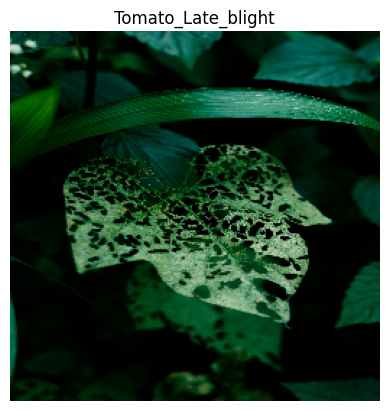

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess
img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)
predicted_label = class_labels[predicted_index]

# Display result
print("✅ Predicted class:", predicted_label)
plt.imshow(img)
plt.axis('off')
plt.title(predicted_label)
plt.show()


##**💬 Part 2: Disease Explanation Chatbot**

We’ll build a simple function that:

  1.Accepts the model's prediction (like "Tomato_Early_blight")

  2.Accepts the farmer’s language ("english" or "swahili")

3.Responds with treatment & prevention advice

**✅ STEP 6: Define the chatbot explainer**

In [ ]:
# Disease explanations in both languages
disease_guide = {
    "Tomato_Early_blight": {
        "english": """🌿 Early Blight (Alternaria solani)

📌 Fungal disease with brown leaf spots on leaves/stems.
🛠️ Use fungicides like chlorothalonil or mancozeb.
🛡️ Avoid overhead watering and rotate crops.""",
        "swahili": """🌿 Early Blight (Alternaria solani)

📌 Ugonjwa wa kuvu unaosababisha madoa ya kahawia kwenye majani na mashina.
🛠️ Tumia dawa ya kuvu kama chlorothalonil au mancozeb.
🛡️ Epuka kumwagilia juu na fanya mzunguko wa mazao."""
    },
    "Tomato_Late_blight": {
        "english": """☁️ Late Blight (Phytophthora infestans)

📌 Gray patches on leaves, spreads quickly in wet conditions.
🛠️ Use copper-based fungicides.
🛡️ Ensure spacing, remove infected plants.""",
        "swahili": """☁️ Late Blight (Phytophthora infestans)

📌 Madoa ya kijivu yanayoenea haraka wakati wa unyevu.
🛠️ Tumia dawa zenye copper.
🛡️ Panda kwa nafasi, ondoa mimea iliyoambukizwa."""
    },
    "Tomato_healthy": {
        "english": """✅ Your tomato plant looks healthy!

🛡️ Keep monitoring regularly and avoid overwatering.""",
        "swahili": """✅ Mimea yako ya nyanya iko salama!

🛡️ Endelea kufuatilia na epuka kumwagilia kupita kiasi."""
    }
}

# Chatbot function
def explain_prediction(label, lang="english"):
    return disease_guide.get(label, {}).get(lang, "❌ No explanation available.")


**✅ STEP 7: Ask user for language & explain**

In [ ]:
lang = input("🌍 Choose language (english/swahili): ").strip().lower()

print("\n💬 Explanation:")
print(explain_prediction(predicted_label, lang))


🌍 Choose language (english/swahili): english

💬 Explanation:
☁️ Late Blight (Phytophthora infestans)

📌 Gray patches on leaves, spreads quickly in wet conditions.
🛠️ Use copper-based fungicides.
🛡️ Ensure spacing, remove infected plants.


## *🌦️ Part 3: Weather-Based Blight Alert System**

We now build a simple weather alert tool that:

✅ Checks weather in your region (via OpenWeatherMap API)
✅ If humidity > 80% → Triggers a blight risk warning
✅ Can be integrated into your chatbot output

**🌦️ STEP 1: Install requests**

In [ ]:
!pip install requests


**🌍 STEP 2: Enter your API key & target location**

In [ ]:
import requests

# 🔑 Replace with your real OpenWeatherMap API key
api_key = "1d5af17ac5484fae2f35780c93a44fb7"
location = "Kerugoya"




In [ ]:
url = f"https://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}&units=metric"
response = requests.get(url)
data = response.json()
print(data)



{'coord': {'lon': 37.2803, 'lat': -0.4989}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.22, 'feels_like': 19.99, 'temp_min': 20.22, 'temp_max': 20.22, 'pressure': 1019, 'humidity': 65, 'sea_level': 1019, 'grnd_level': 854}, 'visibility': 10000, 'wind': {'speed': 2.64, 'deg': 145, 'gust': 2.9}, 'clouds': {'all': 88}, 'dt': 1752402076, 'sys': {'country': 'KE', 'sunrise': 1752377618, 'sunset': 1752421151}, 'timezone': 10800, 'id': 192859, 'name': 'Kerugoya', 'cod': 200}


**🔄 STEP 3: Fetch weather data (current)**

In [ ]:
humidity = data["main"]["humidity"]
temperature = data["main"]["temp"]

print(f"🌡️ Temperature: {temperature}°C")
print(f"💧 Humidity: {humidity}%")

if humidity > 80:
    print("🚨 ALERT: High humidity! Risk of blight.")
else:
    print("✅ Blight risk is low.")



🌡️ Temperature: 20.22°C
💧 Humidity: 65%
✅ Blight risk is low.


**⚠️ STEP 4: Trigger blight alert if humidity > 80%**

In [ ]:
# Sample AI prediction
predicted_label = 'Tomato_Early_blight'

# Sample weather data
humidity = 85
temperature = 21.5

print(f"🌡️ Temperature: {temperature}°C")
print(f"💧 Humidity: {humidity}%")

# Disease-specific guidance
if predicted_label == 'Tomato_Early_blight':
    print("\n🦠 Disease Detected: Early Blight (Alternaria solani)")
    if humidity > 80:
        print("🚨 High humidity detected! Favors early blight spread.")
        print("🛠️ Action: Apply chlorothalonil fungicide. Avoid wetting leaves.")
    else:
        print("⚠️ Treat for early blight, but weather risk is moderate.")
        print("🧼 Maintain dry leaves and good spacing.")

elif predicted_label == 'Tomato_Late_blight':
    print("\n🦠 Disease Detected: Late Blight (Phytophthora infestans)")
    if humidity > 80:
        print("🚨 ALERT: Ideal conditions for late blight outbreak.")
        print("🛠️ Apply copper-based fungicide. Ensure airflow.")
    else:
        print("⚠️ Weather is stable, but treatment is still necessary.")
        print("🌬️ Maintain airflow and reduce moisture.")

elif predicted_label == 'Tomato_healthy':
    print("\n✅ Plant Status: Healthy")
    if humidity > 80:
        print("⚠️ But humidity is high — risk of fungal disease in future.")
        print("🛡️ Preventive tip: Spray light fungicide & monitor closely.")
    else:
        print("🌞 All conditions favorable. Keep up with hygiene & dry foliage.")
else:
    print("❌ Unknown class. Please check the model output.")


🌡️ Temperature: 21.5°C
💧 Humidity: 85%

🦠 Disease Detected: Early Blight (Alternaria solani)
🚨 High humidity detected! Favors early blight spread.
🛠️ Action: Apply chlorothalonil fungicide. Avoid wetting leaves.


## **🧠 Now Your System Can:**
1. 📷 Detect tomato diseases via AI model

2. 💬 Explain diagnosis & give multilingual advice (chatbot)

3. 🌦️ Give weather-based early warnings for blight risk



## **✅ FULL COLAB-READY CODE SNIPPET (Chatbot + Weather Alert):**

Text(value='Kerugoya', description='📍 Location:', layout=Layout(width='50%'), placeholder='Kerugoya', style=De…

Dropdown(description='🌍 Language:', layout=Layout(width='50%'), options=('english', 'swahili'), style=Descript…


📍 Location: Kerugoya
🌡️ Temperature: 11.75°C
💧 Humidity: 94%
📷 Upload a tomato leaf image...


Saving Screenshot 2025-07-20 183016-1.jpg to Screenshot 2025-07-20 183016-1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


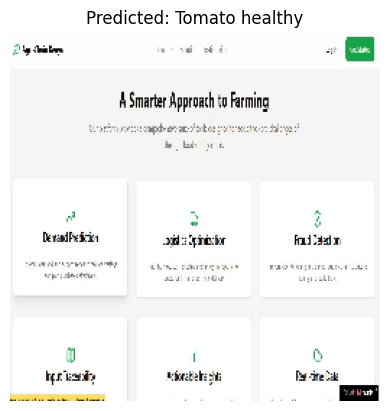


🧪 Predicted Class: Tomato healthy

✅ Plant Status: Healthy
⚠️ But humidity is high — fungal risk is elevated.
🛡️ Preventive tip: Spray light fungicide & monitor.


In [ ]:
# ✅ STEP 1: Imports
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import requests

# ✅ STEP 2: UI Widgets
lang_dropdown = widgets.Dropdown(
    options=['english', 'swahili'],
    value='english',
    description='🌍 Language:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

location_input = widgets.Text(
    value='Kerugoya',
    description='📍 Location:',
    placeholder='Kerugoya',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

display(location_input)
display(lang_dropdown)

# ✅ STEP 3: Weather API Fetching
api_key = "1d5af17ac5484fae2f35780c93a44fb7"  # 🔑 Replace with your OpenWeatherMap API key
location = location_input.value

try:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()

    # Extract values
    humidity = data["main"]["humidity"]
    temperature = data["main"]["temp"]
    print(f"\n📍 Location: {location}")
    print(f"🌡️ Temperature: {temperature}°C")
    print(f"💧 Humidity: {humidity}%")
except:
    humidity = 0
    temperature = 0
    print(f"❌ Could not fetch weather for '{location}' — check spelling or network/API key.")

# ✅ STEP 4: Sample AI Prediction
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

# 📦 Load your trained model (.h5 or .keras)
model = load_model("tomato_model.keras")

# 📤 Upload image to classify
print("📷 Upload a tomato leaf image...")
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# 🧪 Preprocess image
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# 🤖 Make prediction
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)
class_labels = ['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']
predicted_label = class_labels[predicted_index]

# 🖼️ Show the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_label.replace('_', ' ')}")
plt.show()


# ✅ STEP 5: Diagnosis Explanation
def explain_diagnosis(label, humidity, lang):
    print(f"\n🧪 Predicted Class: {label.replace('_', ' ')}")

    if label == 'Tomato_Early_blight':
        if lang == 'swahili':
            print("\n🦠 Ugonjwa: Early Blight (Alternaria solani)")
            if humidity > 80:
                print("🚨 Unyevu mwingi! Hatari ya kuenea kwa ugonjwa huu ni kubwa.")
                print("🛠️ Tumia dawa ya kuvu kama chlorothalonil. Epuka kunyunyiza majani.")
            else:
                print("⚠️ Tibu ugonjwa, lakini hali ya hewa si hatari sana.")
                print("🧼 Hakikisha majani ni makavu na mimea iko na nafasi.")
        else:
            print("\n🦠 Disease: Early Blight (Alternaria solani)")
            if humidity > 80:
                print("🚨 High humidity detected! Favors early blight spread.")
                print("🛠️ Apply chlorothalonil fungicide. Avoid wetting leaves.")
            else:
                print("⚠️ Treat early blight, but weather risk is moderate.")
                print("🧼 Maintain dry leaves and good spacing.")

    elif label == 'Tomato_Late_blight':
        if lang == 'swahili':
            print("\n🦠 Ugonjwa: Late Blight (Phytophthora infestans)")
            if humidity > 80:
                print("🚨 Unyevu mwingi sana! Hatari ya kuenea kwa late blight.")
                print("🛠️ Tumia dawa za copper. Hakikisha upenyo wa hewa upo.")
            else:
                print("⚠️ Tibu ugonjwa. Hali ya hewa ni ya wastani.")
                print("🌬️ Weka nafasi ya hewa na epuka unyevu mwingi.")
        else:
            print("\n🦠 Disease: Late Blight (Phytophthora infestans)")
            if humidity > 80:
                print("🚨 ALERT: Ideal conditions for late blight outbreak.")
                print("🛠️ Apply copper-based fungicide. Ensure airflow.")
            else:
                print("⚠️ Weather is stable, but treatment is still necessary.")
                print("🌬️ Maintain airflow and reduce moisture.")

    elif label == 'Tomato_healthy':
        if lang == 'swahili':
            print("\n✅ Mimea ina afya!")
            if humidity > 80:
                print("⚠️ Lakini unyevu ni mwingi. Hatari ya ugonjwa wa kuvu ipo.")
                print("🛡️ Tumia dawa za kinga na fuatilia hali ya mimea.")
            else:
                print("🌞 Hali ya hewa ni nzuri. Endelea na usafi na nafasi.")
        else:
            print("\n✅ Plant Status: Healthy")
            if humidity > 80:
                print("⚠️ But humidity is high — fungal risk is elevated.")
                print("🛡️ Preventive tip: Spray light fungicide & monitor.")
            else:
                print("🌞 All conditions favorable. Keep up hygiene & spacing.")

    else:
        print("❌ Unknown disease prediction class.")

# ✅ STEP 6: Final Output
lang = lang_dropdown.value
explain_diagnosis(predicted_label, humidity, lang)




